<a href="https://colab.research.google.com/github/rizalramle21/DataAnalistCollect/blob/main/BangladeshCrime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#BangladeshCrimeAnalysist
 Exploring the Trend  of criminal activity over the years in Bangladesh.

##Introduction
An open Kaggle dataset provides aggregate crime data across Bangladesh for each year from 2010 to 2025(may). It includes multiple criminal categories and department-wise (e.g., DMP, CMP, Khulna Range, Sylhet Range) case counts—making it ideal for time-series and jurisdiction-level analysis

##Asking Question
1. What is the trend of criminal activity last 15 years?
2. Where is The most criminal region fot the last 15 years?


###Load Data From Kaggle

In [1]:
from google.colab import files
files.upload()  # Pilih file kaggle.json


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ramlirizal","key":"e9f30aea6b7e3dae0a12fadc3c6576d9"}'}

In [2]:
# Buat folder untuk credential
!mkdir -p ~/.kaggle

# Pindahkan file ke folder tersebut
!cp kaggle.json ~/.kaggle/

# Ubah permission agar bisa diakses
!chmod 600 ~/.kaggle/kaggle.json


In [3]:
!kaggle datasets download -d faheemhere/crime-stats-in-bd-from-2010-to-2025-by-year

Dataset URL: https://www.kaggle.com/datasets/faheemhere/crime-stats-in-bd-from-2010-to-2025-by-year
License(s): CC0-1.0
  0% 0.00/7.74k [00:00<?, ?B/s]
100% 7.74k/7.74k [00:00<00:00, 30.6MB/s]


In [4]:
!unzip crime-stats-in-bd-from-2010-to-2025-by-year.zip


Archive:  crime-stats-in-bd-from-2010-to-2025-by-year.zip
  inflating: BD crime from 2010 to 2025 Total by year.csv  


##Exploratory Data Analysis




In [5]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('BD crime from 2010 to 2025 Total by year.csv')
df.head()


,Names of Unit,Year,Dacoity,Robbery,Murder,Speedy Trial,Riot,Woman & Child Repression,Kidnapping,Police Assault,Burglary,Theft,Other Cases,Arms Act,Explosive Act,Narcotics,Smuggling,Total Cases
0,Barishal Range,2020,11.0,33,143,45,0,1432.0,20.0,18,143,216,5003.0,32,4,2772,8,9880.0
1,BMP,2020,0.0,13,20,20,0,161.0,1.0,1,67,115,449.0,9,0,680,1,1537.0
2,Chittagong Range,2020,83.0,144,727,108,6,2888.0,93.0,78,446,1020,11372.0,474,21,10110,117,27687.0
3,CMP,2020,2.0,81,77,107,0,797.0,13.0,18,123,216,1501.0,410,9,2899,35,6288.0
4,Dhaka Range,2020,109.0,198,704,145,1,3398.0,124.0,97,383,1001,11252.0,138,26,9212,67,26855.0


In [6]:
#Basic information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Names of Unit              282 non-null    object 
 1   Year                       282 non-null    int64  
 2   Dacoity                    282 non-null    float64
 3   Robbery                    282 non-null    int64  
 4    Murder                    282 non-null    int64  
 5    Speedy Trial              282 non-null    int64  
 6    Riot                      282 non-null    int64  
 7    Woman & Child Repression  282 non-null    float64
 8    Kidnapping                282 non-null    float64
 9    Police Assault            282 non-null    int64  
 10   Burglary                  282 non-null    int64  
 11   Theft                     282 non-null    int64  
 12   Other Cases               282 non-null    float64
 13  Arms Act                   282 non-null    int64  

some names are inconsistent

In [7]:
from os import rename
#rename some fitur
df.rename(columns={
    ' Murder' : 'Murder',
    ' Speedy Trial' : 'Speedy Trial',
    ' Riot' : 'Riot',
    ' Woman & Child Repression': 'Woman & Child Repression',
    ' Kidnapping' : 'Kidnapping',
    ' Police Assault' : 'Police Assault',
    ' Burglary' : 'Burglary',
    ' Theft' : 'Theft',
    ' Other Cases': 'Other Cases',
    ' Explosive Act' : 'Explosive Act',
    ' Narcotics' : 'Narcotics'
}, inplace=True)

# Remove leading spaces from all column names
df.columns = df.columns.str.lstrip()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Names of Unit             282 non-null    object 
 1   Year                      282 non-null    int64  
 2   Dacoity                   282 non-null    float64
 3   Robbery                   282 non-null    int64  
 4   Murder                    282 non-null    int64  
 5   Speedy Trial              282 non-null    int64  
 6   Riot                      282 non-null    int64  
 7   Woman & Child Repression  282 non-null    float64
 8   Kidnapping                282 non-null    float64
 9   Police Assault            282 non-null    int64  
 10  Burglary                  282 non-null    int64  
 11  Theft                     282 non-null    int64  
 12  Other Cases               282 non-null    float64
 13  Arms Act                  282 non-null    int64  
 14  Explosive 

In [9]:
#check data distribution
df.describe()

,Year,Dacoity,Robbery,Murder,Speedy Trial,Riot,Woman & Child Repression,Kidnapping,Police Assault,Burglary,Theft,Other Cases,Arms Act,Explosive Act,Narcotics,Smuggling,Total Cases
count,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000
mean,2017.393617,24.234752,52.255319,192.333333,69.312057,3.645390,1012.542908,39.006738,33.716312,134.379433,400.882979,4154.976791,114.468085,27.361702,3150.489362,248.822695,9658.427855
std,4.601295,38.061895,65.487703,263.238973,96.873960,8.765132,1221.831800,52.308951,46.794824,176.057905,487.720463,5054.813116,185.018555,49.618728,4215.202615,454.973509,11041.686087
min,2010.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2013.000000,1.000000,7.250000,16.000000,4.000000,0.000000,99.500000,3.000000,3.000000,13.000000,63.250000,385.750000,7.000000,0.000000,323.500000,6.000000,1215.500000
50%,2017.000000,8.000000,28.000000,69.500000,31.000000,0.000000,347.000000,16.500000,17.000000,57.500000,182.000000,1167.500000,26.000000,5.500000,1186.500000,66.500000,3968.500000
75%,2021.000000,29.000000,66.750000,269.250000,92.000000,3.000000,1781.250000,52.500000,40.000000,165.250000,542.250000,7051.750000,150.000000,30.750000,4225.500000,212.500000,17957.500000
max,2025.000000,184.000000,308.000000,1395.000000,563.000000,83.000000,5115.000000,283.000000,336.000000,713.000000,2240.000000,22429.000000,1188.000000,387.000000,22682.000000,2509.000000,44536.000000


In [37]:
#change numeric feature data types to make analysis easier
df = df.astype({col: 'int64' for col in df.select_dtypes(include='float64').columns})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Names of Unit             282 non-null    object
 1   Year                      282 non-null    int64 
 2   Dacoity                   282 non-null    int64 
 3   Robbery                   282 non-null    int64 
 4   Murder                    282 non-null    int64 
 5   Speedy Trial              282 non-null    int64 
 6   Riot                      282 non-null    int64 
 7   Woman & Child Repression  282 non-null    int64 
 8   Kidnapping                282 non-null    int64 
 9   Police Assault            282 non-null    int64 
 10  Burglary                  282 non-null    int64 
 11  Theft                     282 non-null    int64 
 12  Other Cases               282 non-null    int64 
 13  Arms Act                  282 non-null    int64 
 14  Explosive Act             

In [39]:
#check missing value
df.isnull().sum()

,0
Names of Unit,0
Year,0
Dacoity,0
Robbery,0
Murder,0
Speedy Trial,0
Riot,0
Woman & Child Repression,0
Kidnapping,0
Police Assault,0


there are no missing values

In [40]:
#check duplication
df.duplicated().sum()

np.int64(0)

there are no duplicated data

### Divide the data into 2 categories
To avoid future analysis errors, the dataset is divided into 2 categories (metropolitan & regional) based on regional authority.

In [31]:
# Divided unit metropolitan and regional
metropolitan = ["BMP", "CMP", "DMP", "GMP", "KMP", "RPMP", "RMP", "SMP"]
regional = [
    "Chittagong Range", "Dhaka Range", "Sylhet Range", "Khulna Range",
    "Mymensingh Range", "Rajshahi Range", "Rangpur Range",
    "Barisal Range", "Barishal Range", "Railway Range", "Ralway Range", "ATU"
]

# add column 'Category'
df['Category'] = df['Names of Unit'].apply(
    lambda x: 'Metropolitan' if x in metropolitan else
              'Regional' if x in regional else
              'Unknown'
)


### df_metro

In [34]:
#define df_metro
df_metro = df[df['Category'] == 'Metropolitan']
df_metro.describe()

,Year,Dacoity,Robbery,Murder,Speedy Trial,Riot,Woman & Child Repression,Kidnapping,Police Assault,Burglary,Theft,Other Cases,Arms Act,Explosive Act,Narcotics,Smuggling,Total Cases
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.00000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,2017.500000,7.968750,40.601562,50.296875,47.281250,4.015625,344.109375,23.187500,23.742188,102.68750,275.781250,1238.781250,59.296875,21.054688,1973.710938,55.117188,4267.632812
std,4.627885,12.247409,63.412826,70.775720,79.938848,10.023582,514.245357,38.883786,39.957506,180.93518,515.634918,1923.940657,115.143687,54.955717,3525.972086,86.467200,6893.514232
min,2010.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2013.750000,0.000000,6.000000,11.000000,4.000000,0.000000,95.500000,3.000000,3.000000,13.00000,46.000000,356.250000,5.000000,0.000000,201.250000,2.000000,1196.250000
50%,2017.500000,3.000000,14.500000,22.000000,15.000000,0.000000,158.500000,9.000000,10.000000,40.00000,98.500000,566.500000,16.000000,2.500000,657.000000,16.500000,1687.000000
75%,2021.250000,9.250000,35.250000,57.250000,53.250000,3.000000,311.500000,25.250000,22.250000,65.00000,165.250000,943.000000,51.000000,12.250000,1744.000000,84.250000,3643.000000
max,2025.000000,66.000000,294.000000,339.000000,388.000000,83.000000,2218.000000,208.000000,236.000000,713.00000,2240.000000,8296.000000,756.000000,387.000000,16215.000000,646.000000,28749.000000


In [12]:
df_metro.info()

<class 'pandas.core.frame.DataFrame'>
Index: 128 entries, 1 to 280
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Names of Unit             128 non-null    object 
 1   Year                      128 non-null    int64  
 2   Dacoity                   128 non-null    float64
 3   Robbery                   128 non-null    int64  
 4   Murder                    128 non-null    int64  
 5   Speedy Trial              128 non-null    int64  
 6   Riot                      128 non-null    int64  
 7   Woman & Child Repression  128 non-null    float64
 8   Kidnapping                128 non-null    float64
 9   Police Assault            128 non-null    int64  
 10  Burglary                  128 non-null    int64  
 11  Theft                     128 non-null    int64  
 12  Other Cases               128 non-null    float64
 13  Arms Act                  128 non-null    int64  
 14  Explosive Act  

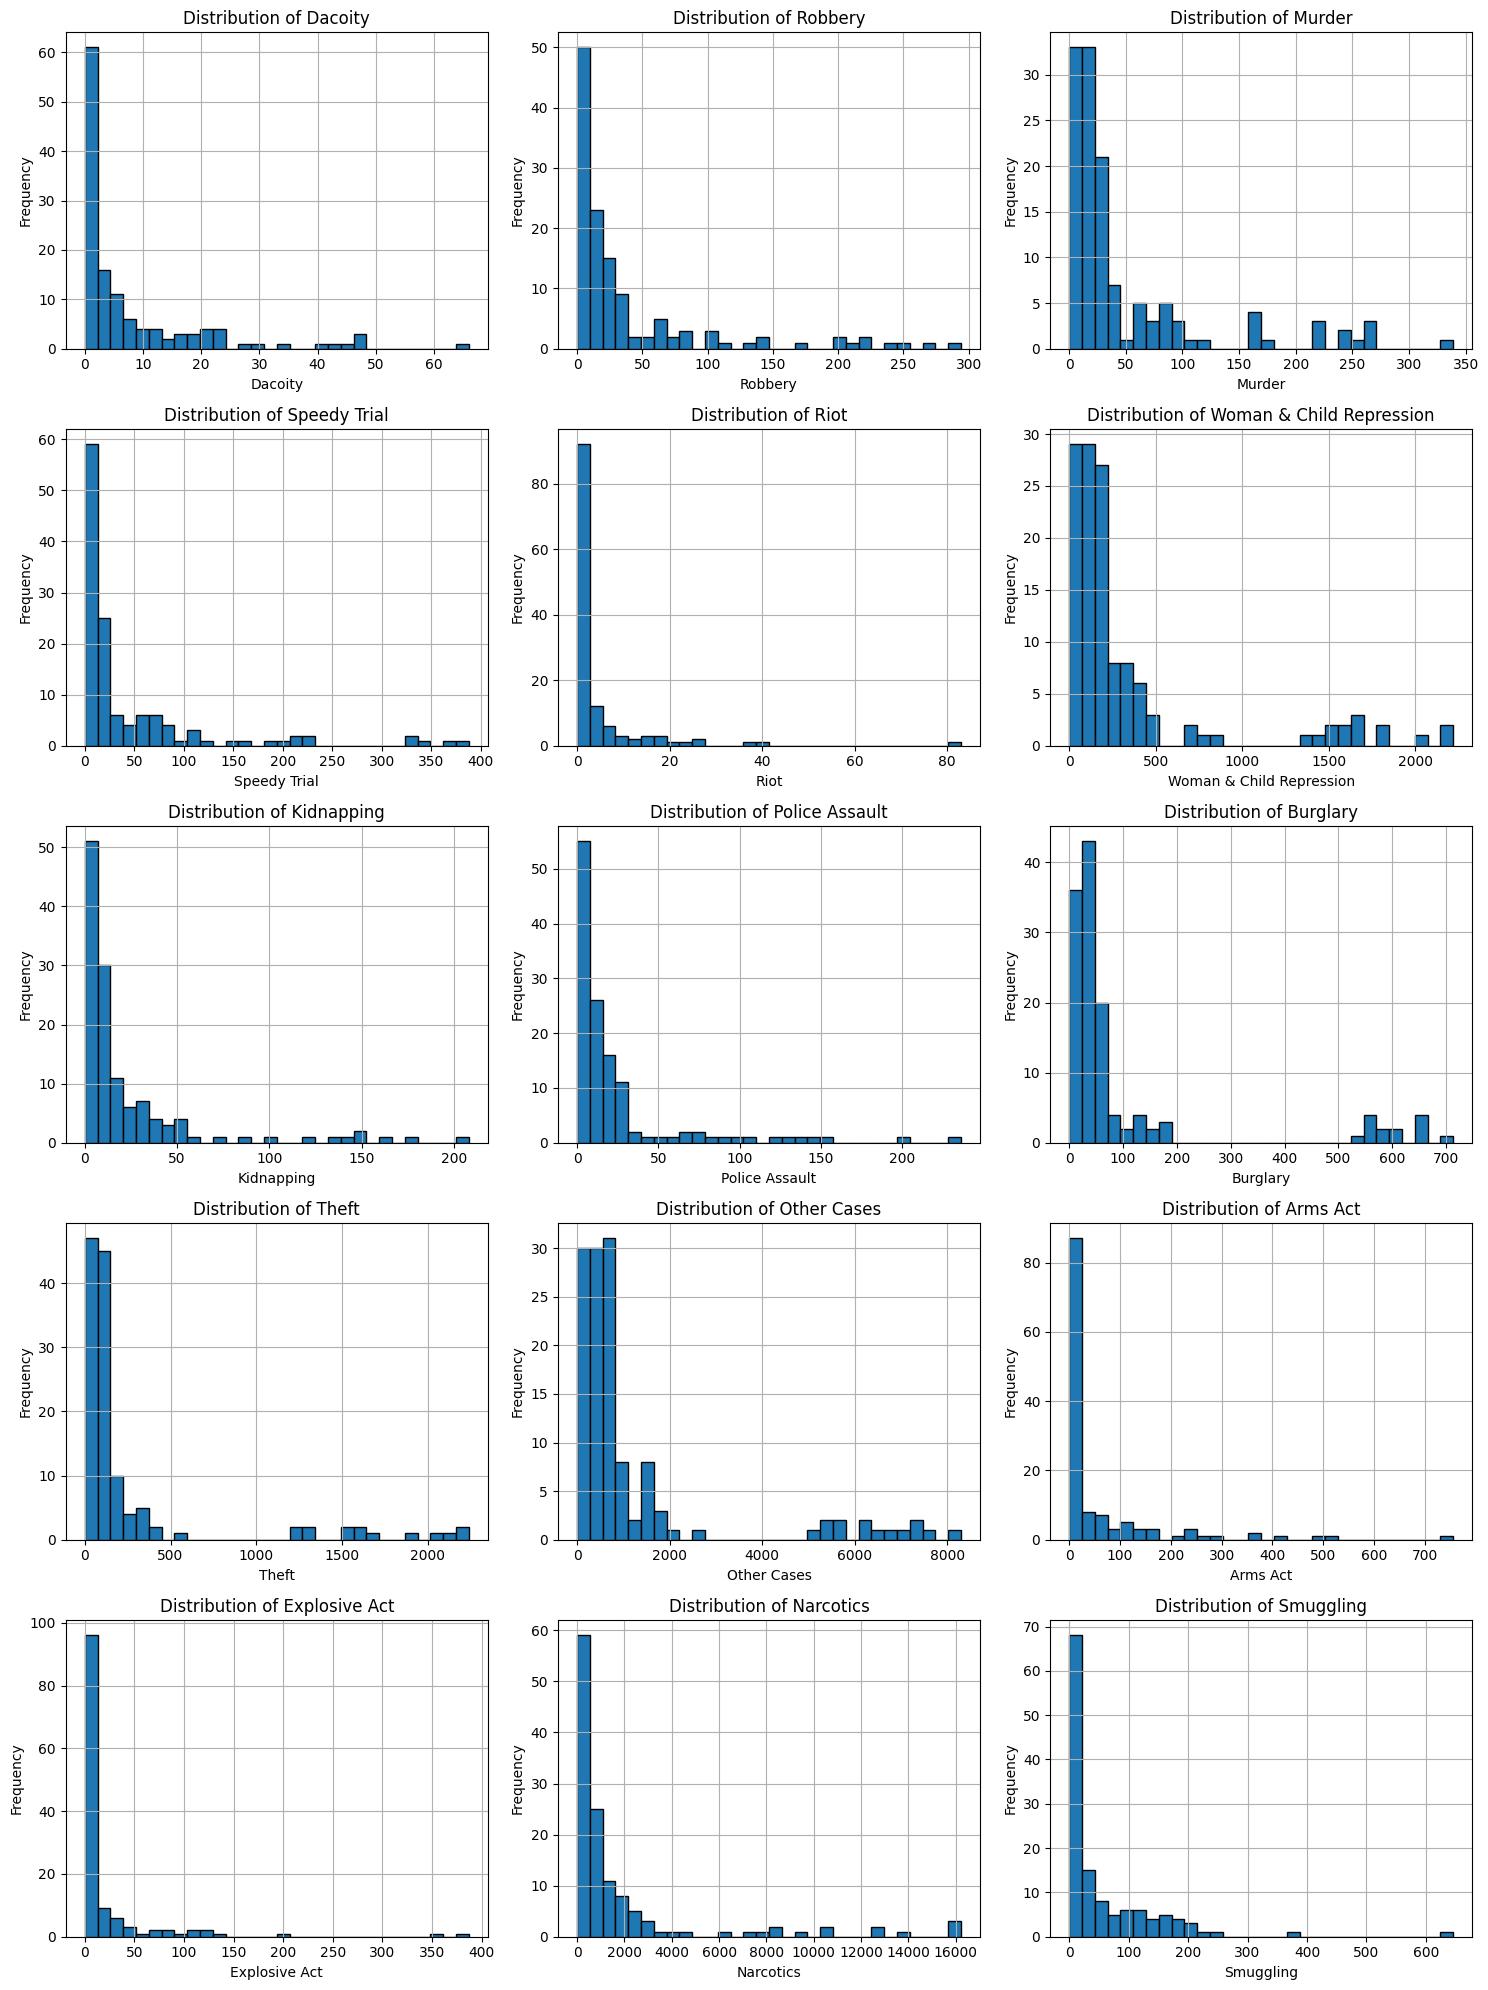

In [46]:
#check df_metro distribution
import matplotlib.pyplot as plt

def plot_feature_distributions(df, features, bins=30):
    num_features = len(features)
    cols = 3  # Jumlah kolom dalam grid plot
    rows = (num_features + cols - 1) // cols  # Menghitung jumlah baris

    plt.figure(figsize=(cols * 5, rows * 4))

    for i, feature in enumerate(features):
        plt.subplot(rows, cols, i + 1)
        df[feature].dropna().hist(bins=bins, edgecolor='black')
        plt.title(f'Distribution of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

features_to_check = [
    'Dacoity', 'Robbery', 'Murder', 'Speedy Trial', 'Riot',
    'Woman & Child Repression', 'Kidnapping', 'Police Assault',
    'Burglary', 'Theft', 'Other Cases', 'Arms Act',
    'Explosive Act', 'Narcotics', 'Smuggling'
]

plot_feature_distributions(df_metro, features_to_check)


In [33]:

# Check outliers df_metro
special_column = ['Dacoity', 'Robbery', 'Murder', 'Speedy Trial', 'Riot',
               'Woman & Child Repression', 'Kidnapping', 'Police Assault',
               'Burglary', 'Theft', 'Other Cases', 'Arms Act',
               'Explosive Act', 'Narcotics', 'Smuggling', 'Total Cases']

def deteksi_outlier_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    under_threshold = Q1 - 1.5 * IQR
    upper_threshold = Q3 + 1.5 * IQR
    outliers = series[(series < under_threshold) | (series > upper_threshold)]
    mean_val = series.mean()
    return outliers, under_threshold, upper_threshold, mean_val

# Loop tiap kolom dan tampilkan outliernya
for column in special_column:
    outliers, under_th, upper_th, mean_val = deteksi_outlier_iqr(df_metro[column])
    print(f"📌 Column: {column}")
    print(f"sum of outliers: {len(outliers)}")
    print(f"Min outlier threshold: {under_th}")
    print(f"Max outlier threshold: {upper_th}")
    print(f"Mean                 : {mean_val}")
    print("-"*50)
    print(outliers)

📌 Column: Dacoity
sum of outliers: 10
Min outlier threshold: -13.875
Max outlier threshold: 23.125
Mean                 : 7.96875
--------------------------------------------------
39     27
56     34
73     41
90     29
102    47
120    43
138    66
156    47
174    47
192    45
Name: Dacoity, dtype: int64
📌 Column: Robbery
sum of outliers: 19
Min outlier threshold: -37.875
Max outlier threshold: 79.125
Mean                 : 40.6015625
--------------------------------------------------
3       81
5      176
22     144
39     145
54     105
56     199
71      98
73     248
90     215
102    220
103    108
120    294
138    222
156    241
174    265
192    205
210    131
228    103
246     83
Name: Robbery, dtype: int64
📌 Column: Murder
sum of outliers: 15
Min outlier threshold: -58.375
Max outlier threshold: 126.625
Mean                 : 50.296875
--------------------------------------------------
5      219
22     166
39     172
56     165
73     339
90     168
102    245
120    259

###df_regional

In [35]:
#define df_regional
df_regional = df[df['Category'] == 'Regional']
df_regional.describe()

,Year,Dacoity,Robbery,Murder,Speedy Trial,Riot,Woman & Child Repression,Kidnapping,Police Assault,Burglary,Theft,Other Cases,Arms Act,Explosive Act,Narcotics,Smuggling,Total Cases
count,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
mean,2017.305195,37.753247,61.941558,310.389610,87.623377,3.337662,1568.123377,52.149351,42.006494,160.720779,504.863636,6578.824675,160.324675,32.603896,4128.590909,409.824675,14139.077922
std,4.592304,46.160322,65.807427,303.648819,105.772668,7.582419,1355.661435,58.194825,50.438275,167.973329,438.407994,5552.175378,217.260570,44.202951,4493.481018,562.574615,11830.095125
min,2010.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2013.000000,3.250000,11.500000,37.250000,4.000000,0.000000,123.750000,6.500000,6.500000,10.000000,121.000000,564.250000,13.000000,2.000000,526.250000,27.250000,1691.500000
50%,2017.000000,20.500000,37.000000,244.500000,58.000000,0.000000,1441.500000,31.000000,27.000000,114.000000,443.500000,6137.500000,45.000000,10.500000,2418.000000,185.000000,11414.500000
75%,2021.000000,54.000000,94.500000,432.750000,115.750000,2.000000,2348.000000,79.750000,49.250000,213.500000,782.750000,10012.500000,260.000000,56.000000,6454.250000,531.000000,22850.000000
max,2025.000000,184.000000,308.000000,1395.000000,563.000000,56.000000,5115.000000,283.000000,336.000000,686.000000,1742.000000,22429.000000,1188.000000,207.000000,22682.000000,2509.000000,44536.000000


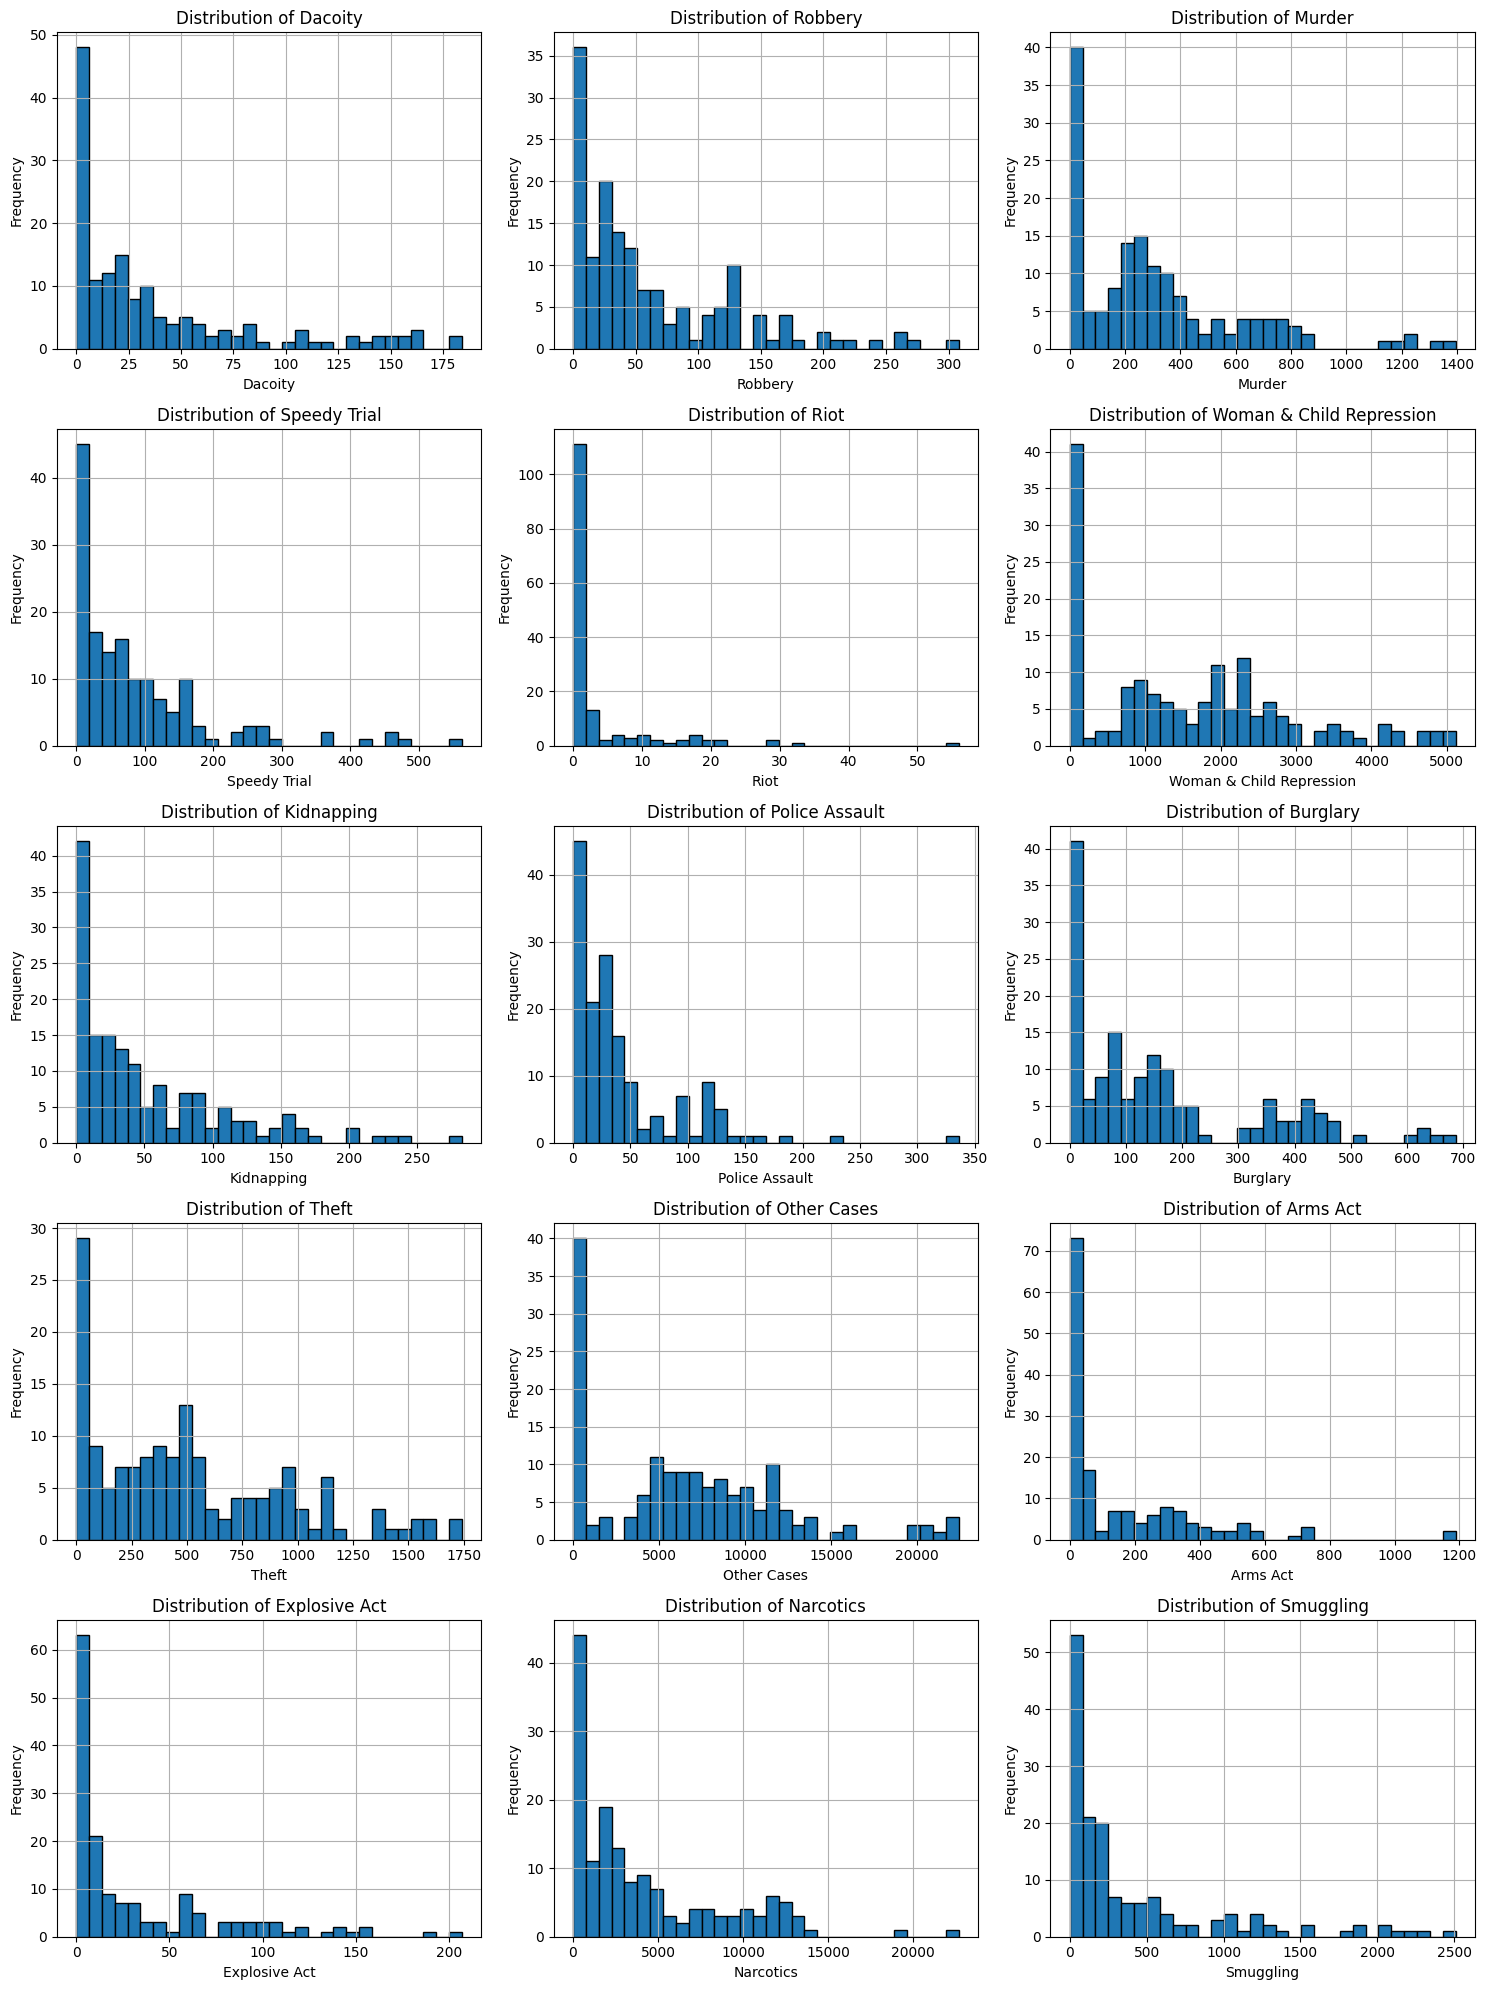

In [47]:
#check df_regional ditribution
plot_feature_distributions(df_regional, features_to_check)

In [36]:
# check outliers df_regional
for column in special_column:
    outliers, under_th, upper_th, mean_val = deteksi_outlier_iqr(df_metro[column])
    print(f"📌 column: {column}")
    print(f"sum of outliers: {len(outliers)}")
    print(f"Min outlier threshold: {under_th}")
    print(f"Max outlier threshold: {upper_th}")
    print(f"Mean                 : {mean_val}")
    print("-"*50)
    print(outliers)


📌 column: Dacoity
sum of outliers: 10
Min outlier threshold: -13.875
Max outlier threshold: 23.125
Mean                 : 7.96875
--------------------------------------------------
39     27
56     34
73     41
90     29
102    47
120    43
138    66
156    47
174    47
192    45
Name: Dacoity, dtype: int64
📌 column: Robbery
sum of outliers: 19
Min outlier threshold: -37.875
Max outlier threshold: 79.125
Mean                 : 40.6015625
--------------------------------------------------
3       81
5      176
22     144
39     145
54     105
56     199
71      98
73     248
90     215
102    220
103    108
120    294
138    222
156    241
174    265
192    205
210    131
228    103
246     83
Name: Robbery, dtype: int64
📌 column: Murder
sum of outliers: 15
Min outlier threshold: -58.375
Max outlier threshold: 126.625
Mean                 : 50.296875
--------------------------------------------------
5      219
22     166
39     172
56     165
73     339
90     168
102    245
120    259

As we can see, the data does not contain missing values or duplicate data. However, the data has an abnormal distribution and many outliers. This problem is not a significant problem because the data is valid and represents the existing reality. We do not need to do anything with the data.

## Q1 : What is the trend of criminal activity last 15 years?

In [48]:
#df_metro
df_metro_summary = df_metro.groupby('Year')['Total Cases'].sum().reset_index()
print(df_metro_summary)


    Year  Total Cases
0   2010        33543
1   2011        32816
2   2012        33192
3   2013        31496
4   2014        30841
5   2015        30554
6   2016        32503
7   2017        39215
8   2018        46451
9   2019         4223
10  2020        42433
11  2021        48670
12  2022        48196
13  2023        43032
14  2024        34196
15  2025        14896


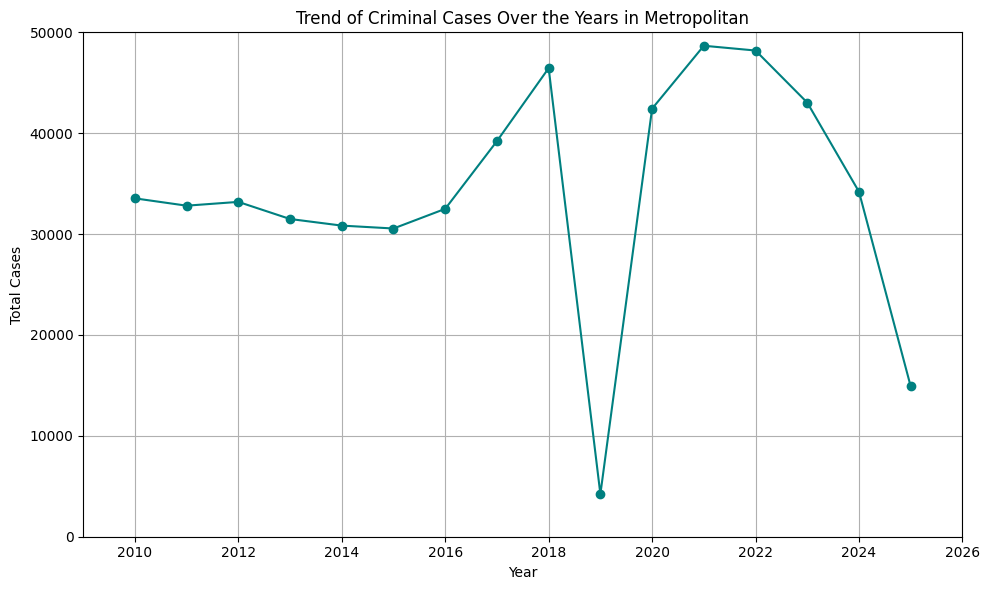

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df_metro_summary['Year'], df_metro_summary['Total Cases'], marker='o', linestyle='-', color='teal')
plt.ylim(0, 50000)
plt.xlim(2009, 2026)
plt.xlabel('Year')
plt.ylabel('Total Cases')
plt.title('Trend of Criminal Cases Over the Years in Metropolitan')
plt.grid(True)
plt.tight_layout()
plt.show()


From the line chart showing the trend of criminal cases in Bangladesh from 2010 to 2025, we observe a relatively stable pattern between 2010 and 2016, with total cases hovering around 30,000 to 33,000 per year. A significant upward trend began in 2017, peaking in 2021 with nearly 49,000 cases.

However, there is a dramatic and unusual drop in 2019, where total cases plunged below 5,000. This sharp decline is likely not a true reflection of crime but rather an anomaly—possibly due to reporting issues, changes in data collection systems, or missing data. The data returned to the previous trend in 2020 and continued normally until 2023.

In 2024 and especially in 2025, the number of reported cases sharply declined again. This could be due to new systemic changes or incomplete data reporting and should be interpreted with caution in further analysis.

In [51]:
#df_regional
df_regional_summary = df_regional.groupby('Year')['Total Cases'].sum().reset_index()
print(df_regional_summary)

    Year  Total Cases
0   2010       129355
1   2011       136851
2   2012       150215
3   2013       147703
4   2014       152888
5   2015       149281
6   2016       148665
7   2017       174314
8   2018       174968
9   2019        13261
10  2020       145493
11  2021       148831
12  2022       155262
13  2023       151341
14  2024       137793
15  2025        61197


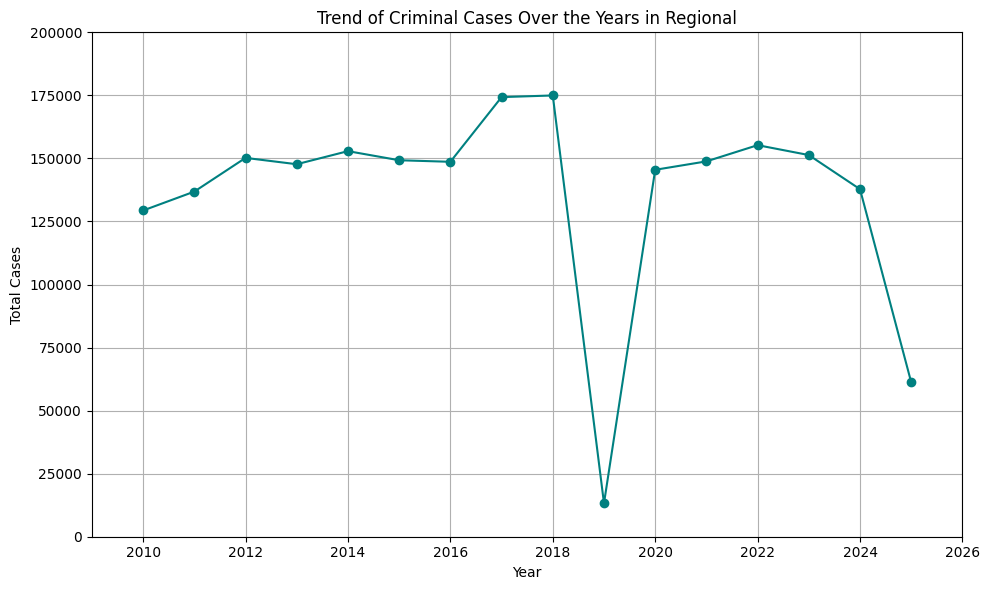

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df_regional_summary['Year'], df_regional_summary['Total Cases'], marker='o', linestyle='-', color='teal')
plt.ylim(0, 200000)
plt.xlim(2009, 2026)
plt.xlabel('Year')
plt.ylabel('Total Cases')
plt.title('Trend of Criminal Cases Over the Years in Regional')
plt.grid(True)
plt.tight_layout()
plt.show()


The trend of criminal cases in Bangladesh between 2010 and 2025 appears relatively stable, with total cases generally ranging between 130,000 and 175,000 annually. However, there are two significant anomalies. In 2019, there is a sharp and dramatic drop in reported cases, reaching a historical low of around 15,000, which is likely due to either a data recording error or changes in the data collection system. The following year, in 2020, the case numbers return to normal levels, suggesting that the 2019 drop was not a true reflection of reality. In 2025, another noticeable decrease is observed, though not as extreme as in 2019. These outliers should be considered carefully when analyzing the overall trend.



In [21]:
# sum Total case/year
total_per_year = df.groupby('Year')['Total Cases'].sum()

# average total case/year
avg_totalcases = total_per_year.mean()
print(f"Average Total Cases per years: {avg_totalcases}")


Average Total Cases per years: 170229.6875


In [64]:
#make a new dataframe
crime_columns = ['Dacoity', 'Robbery', 'Murder', 'Speedy Trial', 'Riot',
                 'Woman & Child Repression', 'Kidnapping', 'Police Assault',
                 'Burglary', 'Theft', 'Other Cases', 'Arms Act',
                 'Explosive Act', 'Narcotics', 'Smuggling']


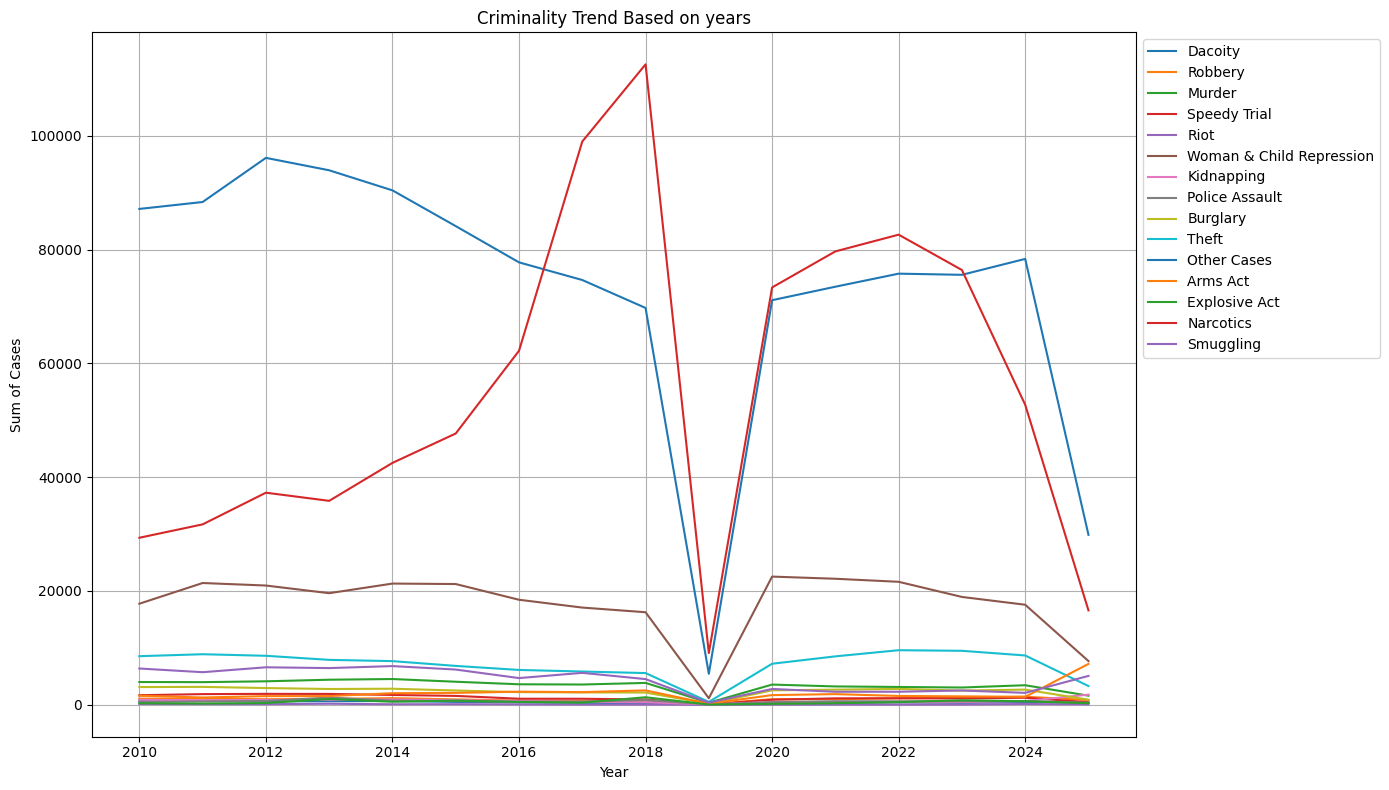

In [23]:
plt.figure(figsize=(14, 8))

for crime in crime_columns:
    yearly_crime = df.groupby('Year')[crime].sum()
    plt.plot(yearly_crime.index, yearly_crime.values, label=crime.replace('_', ' ').title())

plt.title('Each Criminality Trend Based on years')
plt.xlabel('Year')
plt.ylabel('Sum of Cases')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()


From the line chart showing the sum of each case, we can see that narcotics and other cases have been the top two types of criminal cases in Bangladesh over the past 15 years. The data from 2019 shows that all types of criminal cases decreased overall, suggesting that the decline was not due to a failure in the data entry process, but rather indicates that the data is valid.

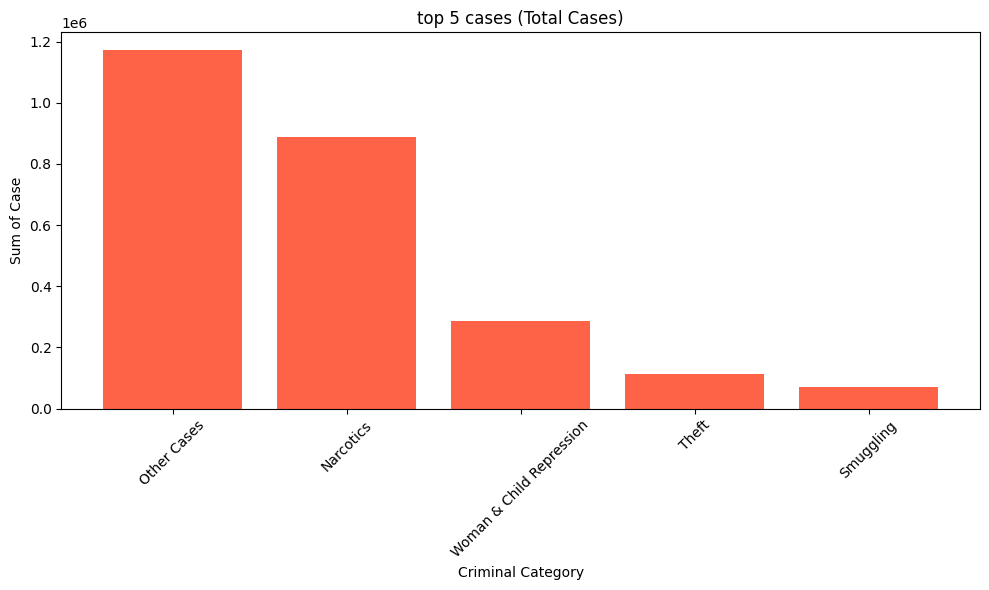

In [24]:
# Agregation cases
total_cases_per_category = df.drop(columns =['Year','Category','Names of Unit', 'Total Cases'], axis=1).sum().sort_values(ascending=False)
import matplotlib.pyplot as plt

# take top 5 cases
top5 = total_cases_per_category.head(5)

# Plot Bar Chart
plt.figure(figsize=(10, 6))
plt.bar(top5.index, top5.values, color='tomato')
plt.title('top 5 cases (Total Cases)')
plt.xlabel('Criminal Category')
plt.ylabel('Sum of Case')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



1. “Other Cases” dominate significantly
  -The number of cases is nearly 1.2 million, far surpassing any other category.
  -This suggests that the majority of reported crimes are either not specifically categorized or consist of various minor case types.

2. Narcotics is the second highest category:
  With almost 900,000 cases, it highlights that drug abuse and trafficking remain a serious issue in the area.

3. “Woman & Child Repression” ranks third:
  Approximately 300,000 cases indicate a troubling prevalence of domestic violence and child abuse, calling for more attention from authorities and social programs.

4. Theft and Smuggling are relatively low:
  These categories show a smaller number of cases, which may indicate:
  Improved prevention and enforcement, or differences in how these cases are reported or categorized.



## Q2 : Where is The most criminal region?

In [57]:
#df_metro
# Hitung jumlah Total Cases untuk unit-unit Metropolitan
total_cases_metro = metro_df['Total Cases'].sum()

print(f"sum of Total Cases unit Metropolitan: {total_cases_metro}")

# Total Cases per Unit Metropolitan
total_per_unit = metro_df.groupby('Names of Unit')['Total Cases'].sum().sort_values(ascending=False)

print(total_per_unit)



sum of Total Cases unit Metropolitan: 546257
Names of Unit
DMP     333067
CMP      79912
RMP      36092
KMP      26515
SMP      24964
BMP      21606
GMP      15953
RPMP      8148
Name: Total Cases, dtype: int64


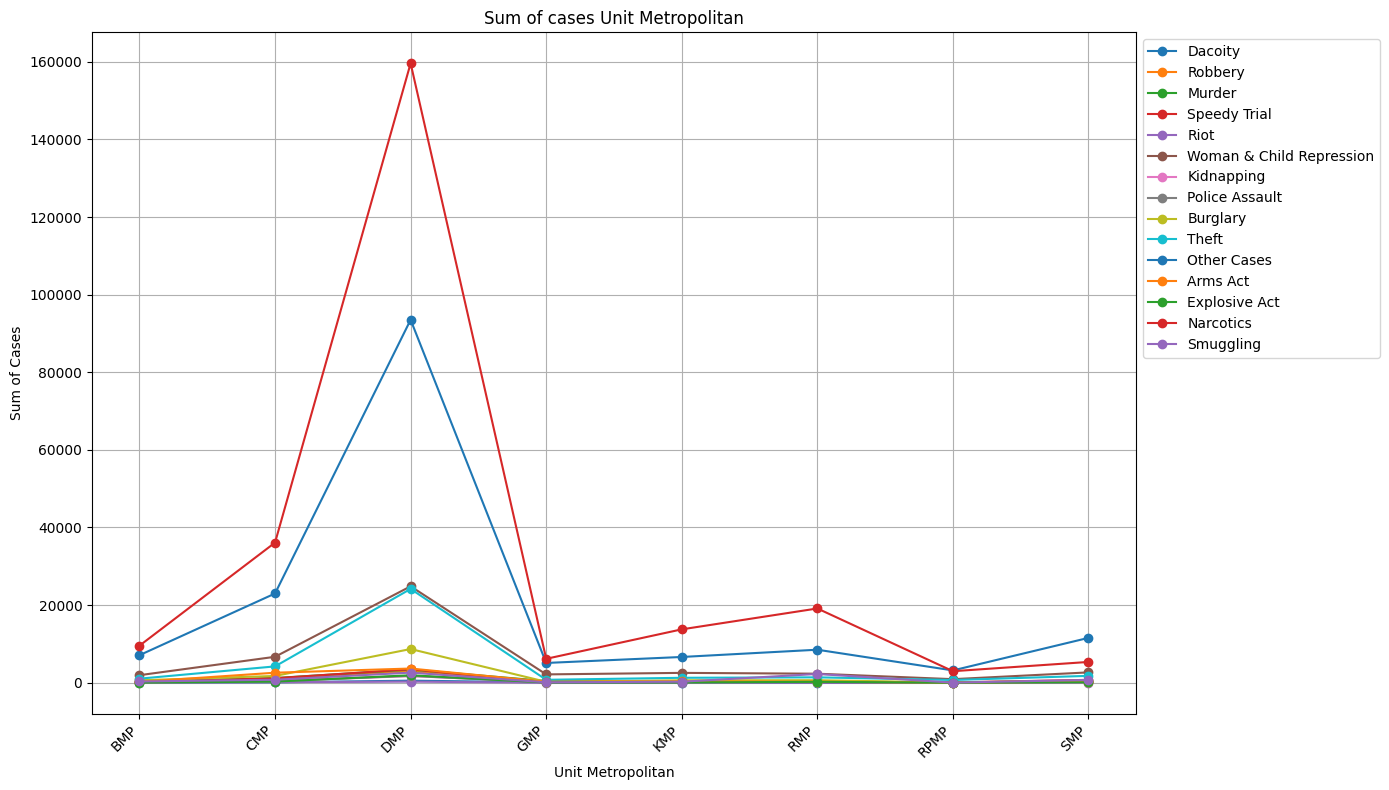

In [67]:
#df_metro
plt.figure(figsize=(14, 8))
# Plot tren jumlah kasus per unit Metropolitan
for crime in crime_columns:
    unit_crime = df_metro.groupby('Names of Unit')[crime].sum()
    plt.plot(unit_crime.index, unit_crime.values, marker='o', label=crime.replace('_', ' ').title())

plt.title('Sum of cases Unit Metropolitan')
plt.xlabel('Unit Metropolitan')
plt.ylabel('Sum of Cases')
plt.xticks(rotation=45, ha='right')  # Supaya label tidak tumpang tindih
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()


From the chart displaying the total number of criminal cases across metropolitan units, it is clear that DMP (Dhaka Metropolitan Police) dominates in terms of overall reported crime, especially in Murder and Dacoity cases, which significantly outnumber those in all other units.

DMP recorded nearly 160,000 murder cases and around 90,000 dacoity cases, far exceeding the numbers in other metropolitan areas. The second highest contributors are CMP (Chittagong Metropolitan Police) and KMP (Khulna Metropolitan Police), but their totals are still considerably lower than DMP.

All other metropolitan units like GMP, RMP, RPMP, SMP, and BMP show relatively modest and more uniform crime levels. Among crime types, Narcotics, Theft, and Other Cases appear frequently in all units, but none reach the extreme levels observed in DMP.

This suggests that Dhaka, being the capital and the largest urban center, may face significantly higher crime pressure and requires focused attention in law enforcement and crime prevention strategies.

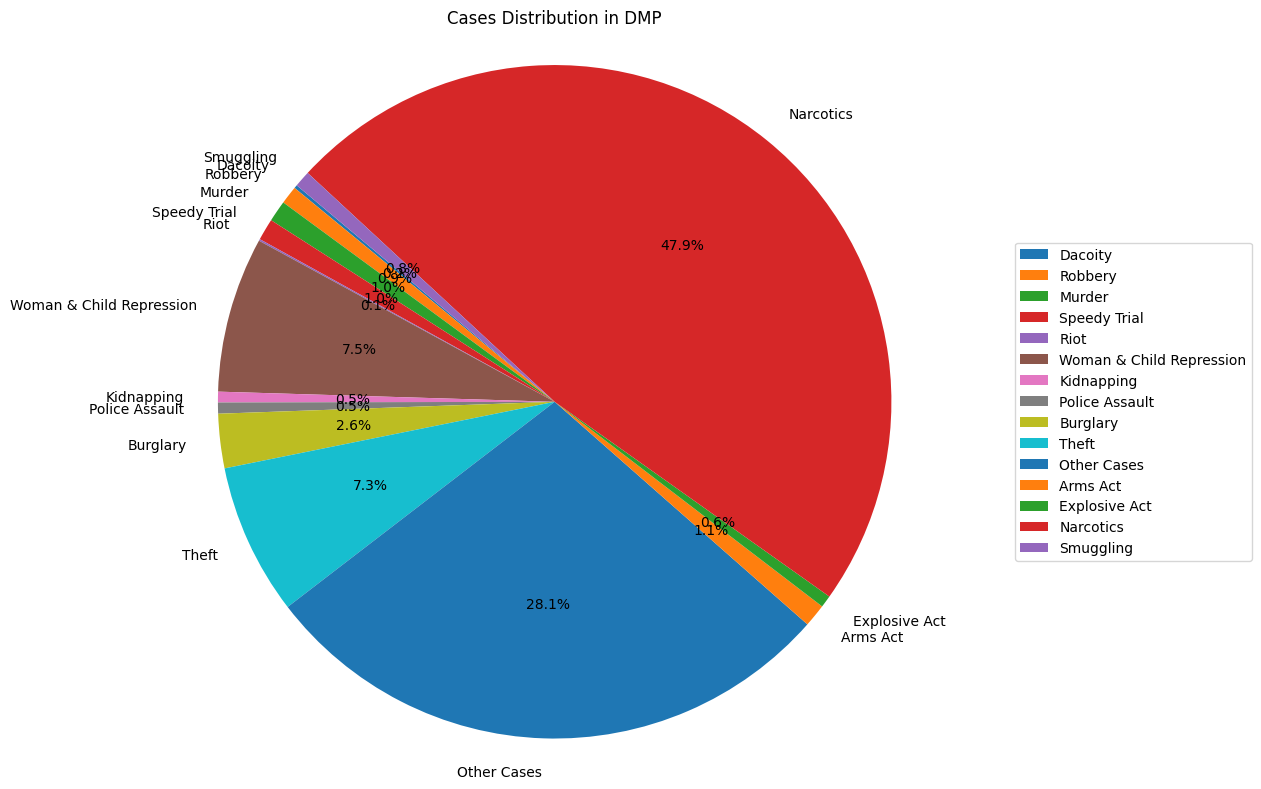

In [73]:
#check DMP for detail
# Filter  unit DMP
dmp_df = df_metro[df_metro['Names of Unit'] == 'DMP']

#sum of each case in DMP
crime_totals = dmp_df[crime_columns].sum()

#Pie Chart
plt.figure(figsize=(12, 8))
plt.pie(crime_totals, labels=crime_totals.index, autopct='%1.1f%%', startangle=140)
plt.legend(labels=crime_totals.index, loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Cases Distribution in DMP')
plt.axis('equal')
plt.tight_layout()
plt.show()


In DMP (Dhaka Metropolitan Police), Narcotics-related cases dominate the criminal case distribution, accounting for 47.9% of the total. This indicates that drug-related crimes have been the most severe and persistent issue in the area over the past 15 years.

Following Narcotics, Other Cases contribute 28.1%, and Theft makes up 7.3%. These three categories alone represent more than 80% of all reported cases.

Other notable but comparatively smaller proportions include:

-Woman & Child Repression: 7.5%

-Burglary: 2.6%

-Police Assault: 0.5%

-Kidnapping: 0.3%

-murder, Robbery, Arms Act, and others: <1% each

This distribution highlights the need for focused intervention in narcotics control, alongside addressing theft and crimes against women and children in the DMP jurisdiction.

In [70]:
#df_regional
# SUM OF Cases in df_regional
total_cases_metro = df_regional['Total Cases'].sum()

print(f"Sum of Cases in Regional: {total_cases_metro}")

# Total Cases per Unit RRegional
total_per_unit = df_regional.groupby('Names of Unit')['Total Cases'].sum().sort_values(ascending=False)

print(total_per_unit)



Sum of Cases in Regional: 2177418
Names of Unit
Dhaka Range         518735
Chittagong Range    408645
Rajshahi Range      356460
Khulna Range        280943
Rangpur Range       224421
Sylhet Range        128566
Mymensingh Range    105055
Barisal Range        91744
Barishal Range       51989
Railway Range         7680
Ralway Range          3180
ATU                      0
Name: Total Cases, dtype: int64


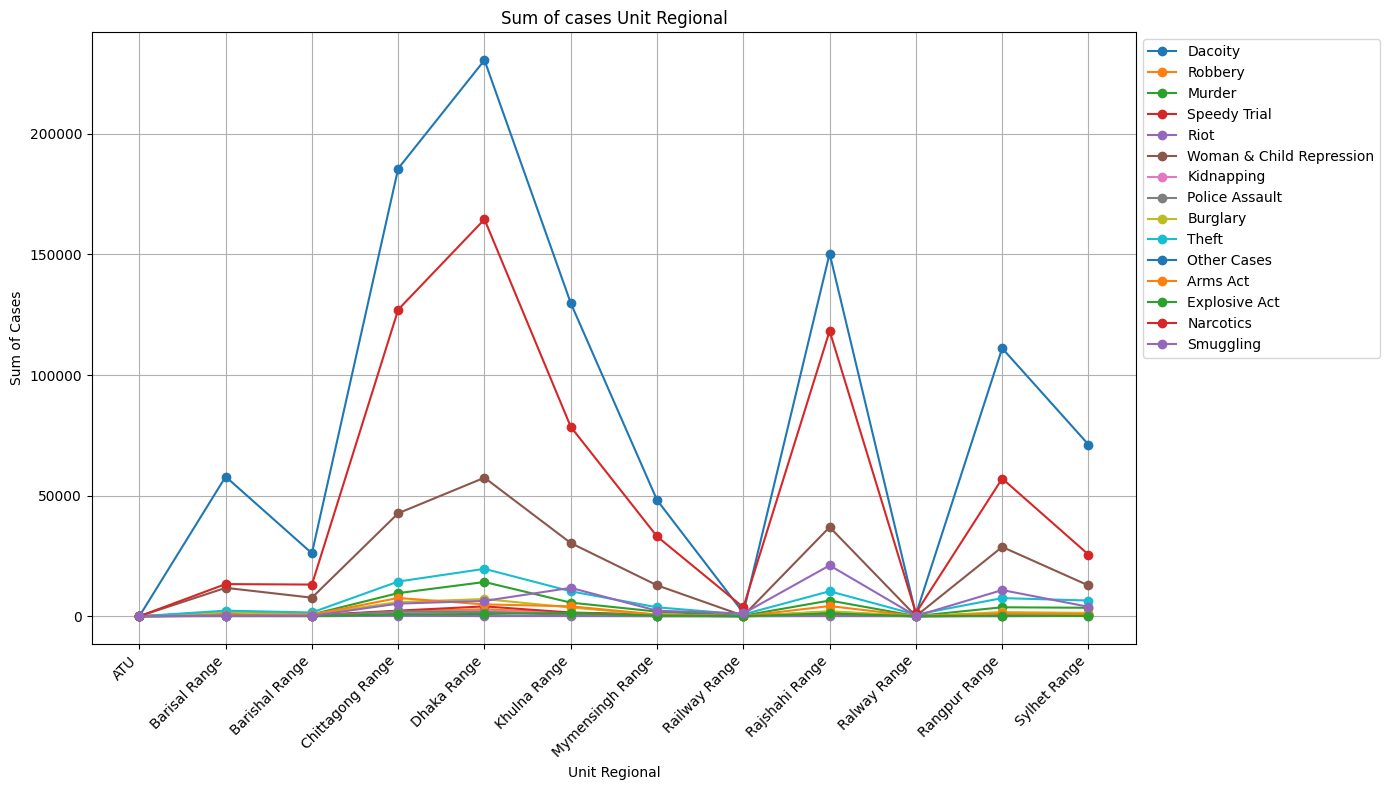

In [72]:
plt.figure(figsize=(14, 8))

# Plot tren jumlah kasus per unit Metropolitan
for crime in crime_columns:
    unit_crime = df_regional.groupby('Names of Unit')[crime].sum()
    plt.plot(unit_crime.index, unit_crime.values, marker='o', label=crime.replace('_', ' ').title())

plt.title('Sum of cases Unit Regional')
plt.xlabel('Unit Regional')
plt.ylabel('Sum of Cases')
plt.xticks(rotation=45, ha='right')  # Supaya label tidak tumpang tindih
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()


From the line chart illustrating the distribution of criminal cases across regional police units:
1. Dhaka Range consistently reports the highest number of cases, particularly in:
*   Narcotics: over 220,000 cases
*   Other Cases and Theft also show significant volumes.
*   Narcotics and Theft form the dominant problem areas in Dhaka.

2. Rajshahi Range and Rangpur Range follow with notably high cases in Narcotics, Other Cases, and Theft, though still far below Dhaka’s figures.

3. Barisal Range and Sylhet Range also have spikes in Narcotics cases, while other crime categories remain lower.

4. Chittagong Range also shows moderate levels of crime across many categories, especially in Theft and Narcotics.

5. Railway Ranges (Eastern and Western) report very low numbers across all categories, suggesting these are less crime-prone areas or underreported regions.

6. Crime types like Murder, Robbery, Police Assault, Explosive Act, and Kidnapping remain relatively low in all regions compared to Narcotics, Theft, and Other Cases.

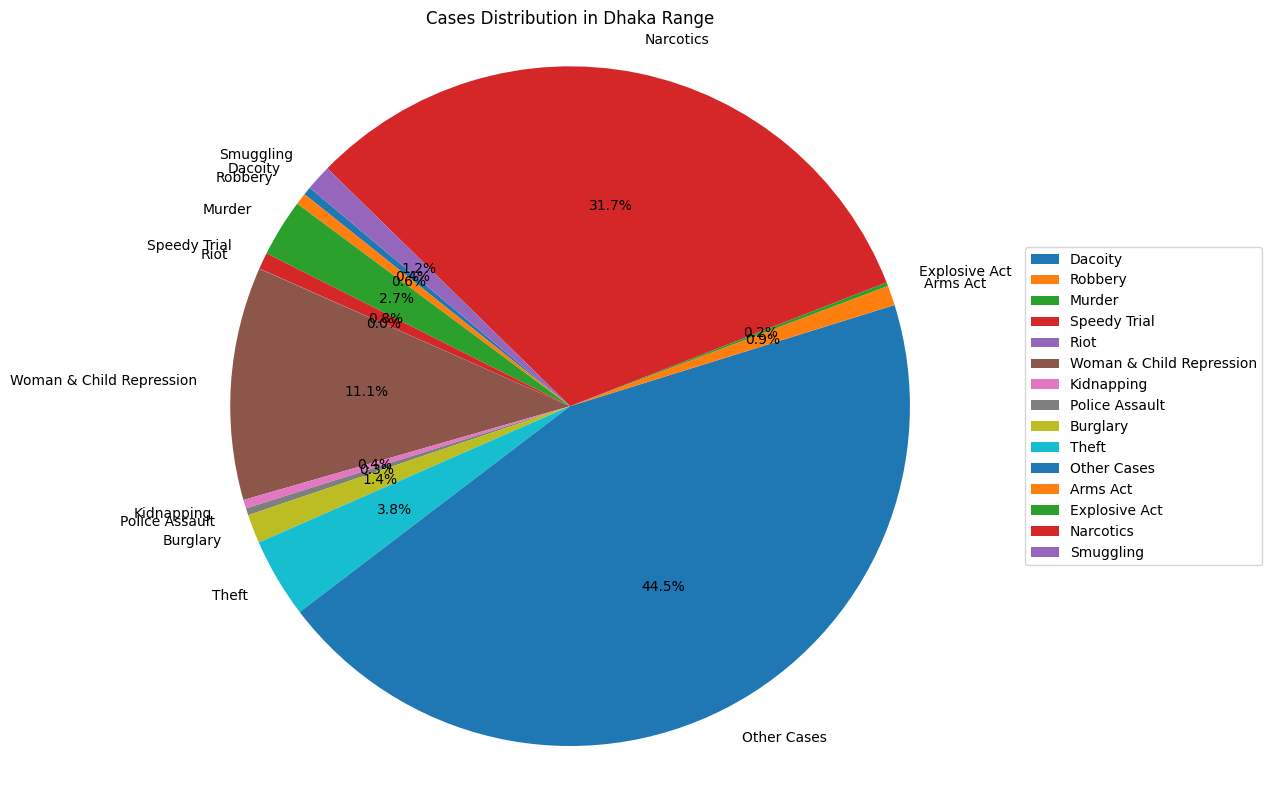

In [74]:
#check DMP for detail
# Filter  unit dhaka
dhaka_df = df_regional[df_regional['Names of Unit'] == 'Dhaka Range']

#sum of each case in Dhaka
crime_totals = dhaka_df[crime_columns].sum()

#Pie Chart
plt.figure(figsize=(12, 8))
plt.pie(crime_totals, labels=crime_totals.index, autopct='%1.1f%%', startangle=140)
plt.legend(labels=crime_totals.index, loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Cases Distribution in Dhaka Range')
plt.axis('equal')
plt.tight_layout()
plt.show()


1. "Other Cases" dominate the dataset, comprising 44.5% of the total.
→ This broad category likely includes minor or miscellaneous offenses.

2. "Narcotics" is the second-largest category at 31.7%, indicating that drug-related crimes are a major concern in Bangladesh.

3. "Woman & Child Repression" accounts for 11.1%, reflecting significant social and gender-based violence issues.

4. "Theft" (3.8%) and "Murder" (2.7%) are present but relatively lower than expected compared to "Narcotics" and "Other Cases".

5. The remaining categories (e.g., Smuggling, Robbery, Kidnapping, Police Assault) each make up less than 2% of the total, indicating they are less frequent or less reported.

#Conclusion
**1. Dominant Crime Types**

  Across all units, the categories **“Other Cases”** and **“Narcotics” **consistently dominate, accounting for over 75% of all criminal cases.

  The prevalence of crime against women & children also emerged as significant, particularly in Metropolitan areas.

**2. Geographic Disparities**

  Dhaka Metropolitan Police (DMP) and Dhaka Range register substantially higher volumes across all crime types compared to other units, especially narcotics and centralized “Other Cases.”

  Rajshahi and Rangpur Ranges also display moderate levels, while peripheral ranges such as Barisal, Sylhet, and Railway show lower crime totals.



